<AxesSubplot:xlabel='Date'>

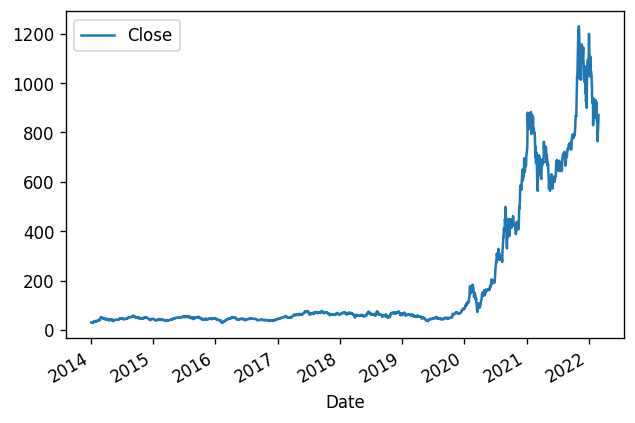

In [6]:
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 120

import yfinance
ticker = yfinance.Ticker("TSLA")
tesla_frame = ticker.history(period="1d", start="2014-01-01", end="2022-03-01")["Close"].to_frame()
tesla_frame.plot()

### Use statsmodels to implement lowess smoothing

takes 3 inputs & returns a 2D array  
Inputs: 
- endogenous values (y's) => data column
- exogenous values (x's) => index
- fraction: what portion of whole goes into the moving window  

Outputs: 
- the possibly changed
- the smoothed y values



In [8]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
tesla_frame['Smoothed'] = lowess(tesla_frame['Close'], tesla_frame.index, frac=0.03) [:,1]
tesla_frame.head()

,Close,Smoothed
Date,,
2014-01-02,30.020000,28.291711
2014-01-03,29.912001,28.572859
2014-01-06,29.400000,29.418830
2014-01-07,29.872000,29.701666
2014-01-08,30.256001,29.984925


<AxesSubplot:xlabel='Date'>

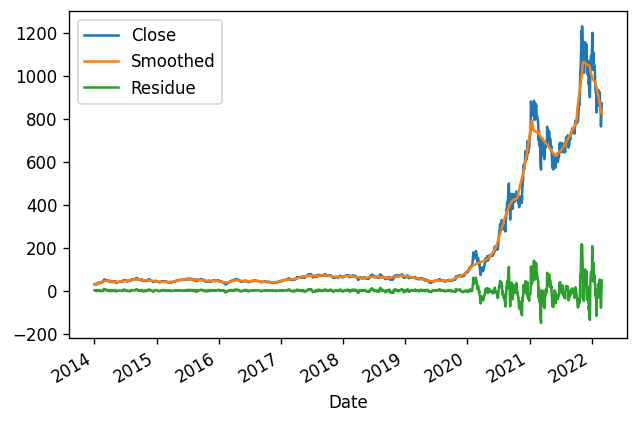

In [9]:
# get residue
tesla_frame['Residue'] = tesla_frame['Close'] - tesla_frame['Smoothed'] 
tesla_frame.plot()

# AR(p) to predict residuals


In [10]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(tesla_frame.reset_index()['Residue'], lags = 3).fit()
res_prediction = ar_model.predict()
res_prediction.index = tesla_frame.index



# Naive differences to predict trend


In [11]:
trend_prediction = 2 * tesla_frame['Smoothed'].shift(1) -tesla_frame['Smoothed'].shift(2) # naive differences

# Combine predictions and plot

<AxesSubplot:xlabel='Date'>

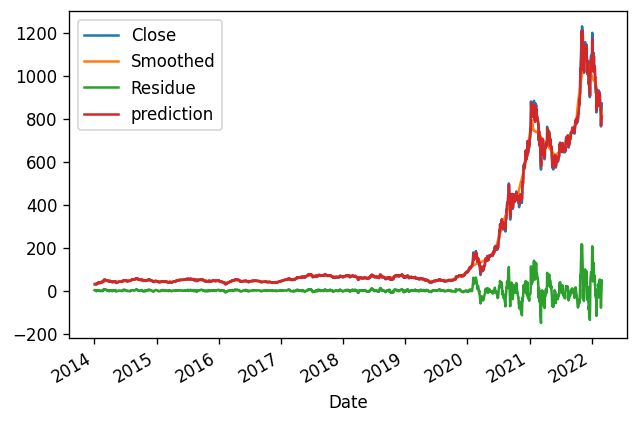

In [12]:
prediction = trend_prediction + res_prediction
tesla_frame['prediction'] = prediction
tesla_frame.plot()

## compute rmse

In [13]:
import math
def rmse(predicted, actual):
    diffs = predicted - actual
    return math.sqrt((diffs ** 2).sum()) / len(diffs.dropna())

rmse from exponential smoothing model was 1.389

In [14]:
print("RMSE: ", rmse(prediction, tesla_frame['Close']))
print("RMSE naive:", rmse(tesla_frame['Close'].shift(), tesla_frame['Close']))

RMSE:  0.2841827472586269
RMSE naive: 0.28870054346403545
